In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [57]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

In [51]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/psds/'

In [52]:
colors = ['#2a9d8f', '#e76f51', '#eba75f', '#2f4f4f']

In [53]:
aplus = np.loadtxt(PATH_TO_DATA + 'aplus_psd.txt', usecols=[0,1])
ce = np.loadtxt(PATH_TO_DATA + 'CE_psd.txt', usecols=[0,1])
a_sharp = np.loadtxt(PATH_TO_DATA + 'a_sharp_psd.txt', usecols=[0,1])


et10 = np.loadtxt(PATH_TO_DATA + 'ET_10_full_cryo_psd.txt', usecols=[0,1])
et15 = np.loadtxt(PATH_TO_DATA + 'ET_15_full_cryo_psd.txt', usecols=[0,1])
virgo = np.loadtxt(PATH_TO_DATA + 'virgo_psd.txt', usecols=[0,1])
kagra = np.loadtxt(PATH_TO_DATA + 'kagra_psd.txt', usecols=[0,1])

kagra_db = pd.DataFrame(data = {'fre':kagra[:,0], 'asd':np.sqrt(kagra[:,1])}) 
kagra_db = kagra_db.loc[kagra_db['fre'] >= 8.]  

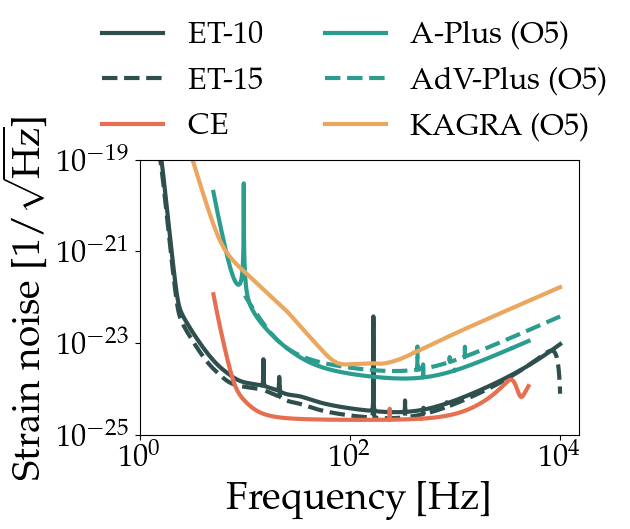

In [79]:
my_fontsize = 28
my_linewidth = 3.

mpl.rc('xtick',labelsize = my_fontsize-6) 
mpl.rc('ytick', labelsize = my_fontsize-6)


fig, ax = plt.subplots(1,1,figsize = (6,4))

ax.loglog(et10[:,0],np.sqrt(et10[:,1]),linewidth=my_linewidth,label='ET-10', color=colors[3], linestyle='solid')
ax.loglog(et15[:,0],np.sqrt(et15[:,1]),linewidth=my_linewidth,label='ET-15', color=colors[3], linestyle='dashed')
ax.loglog(ce[:,0],np.sqrt(ce[:,1]),linewidth=my_linewidth,label='CE', color=colors[1])
ax.loglog(aplus[:,0],np.sqrt(aplus[:,1]),linewidth=my_linewidth,label='A-Plus (O5)', color=colors[0])
ax.loglog(virgo[:,0],np.sqrt(virgo[:,1]),linewidth=my_linewidth,label='AdV-Plus (O5)',color=colors[0], linestyle='dashed')
ax.loglog(kagra[:,0],np.sqrt(kagra[:,1]),linewidth=my_linewidth,label='KAGRA (O5)',color=colors[2])

ax.set_ylim(10**(-25), 10**(-19))
ax.set_xlim(1, 1.5*10**4)
ax.set_xlabel(r'Frequency [$\rm Hz$]',fontsize=my_fontsize)
ax.set_ylabel(r'Strain noise [$1/ \sqrt{\rm Hz}$]',fontsize=my_fontsize)

fig.legend(fontsize=my_fontsize-6, loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.6, 1.35))
plt.tight_layout()
plt.savefig('plots/kn_psd_detectors.pdf', bbox_inches='tight')
plt.show()